Notebook to evaluate the system on the Sudoku dataset

In [1]:
import itertools
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

from ar_sudoku_solver.ar_sudoku_solver import ARSudokuSolver

2023-12-09 20:53:18.269697: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Get names of files in the Sudoku dataset and instantiate the solver

In [2]:
dir_path = "sudoku_dataset"
file_names = list(filter(
    lambda s: 0 < len(s),
    set(file_name.split(".")[0] for file_name in os.listdir(dir_path)
)))

ar_sudoku_solver = ARSudokuSolver()

Evaluate the solver on the dataset

In [3]:
extracted_grids = 0  # No. of extracted grids
all_digits_accuracy = 0  # No. of grids with all digits classified correctly
digits_accuracy = 0  # No. of correctly classified digits
digits_true = []  # True digits
digits_pred = []  # Predicted digits

for file_name in file_names:
    file_path_without_ext = os.path.join(dir_path, file_name)
    
    # Get true grid
    with open(f"{file_path_without_ext}.dat", mode="r") as f:
        grid_true = [list(map(int, line.split())) for line in f.readlines()[2:]]

    # Get predicted grid
    image = cv2.imread(f"{file_path_without_ext}.jpg")
    _, transformed_images, _ = ar_sudoku_solver.extract_grids(image)
    grids_pred = [ar_sudoku_solver.extract_digits(image) for image in transformed_images]
    grids_pred = [grid for grid in grids_pred if grid is not None]
    
    # Update evaluation metrics
    if len(grids_pred) == 1:
        extracted_grids += 1
        all_correct = True

        for y, x in itertools.product(range(9), range(9)):
            if grid_true[y][x] == grids_pred[0][y][x]:
                digits_accuracy += 1
            else:
                all_correct = False

            digits_true.append(grid_true[y][x])
            digits_pred.append(grids_pred[0][y][x])
                
        if all_correct: 
            all_digits_accuracy += 1

percent_extracted_grids = round(extracted_grids * 100 / len(file_names), 3)
all_digits_accuracy = round(all_digits_accuracy * 100 / extracted_grids, 3)
digits_accuracy = round(digits_accuracy * 100 / (extracted_grids * 81), 3)

% Extracted Grids  : 67.0
All Digits Accuracy: 20.896
Digits     Accuracy: 86.659


Text(0.5, 21.34715460257995, 'Predicted Label')

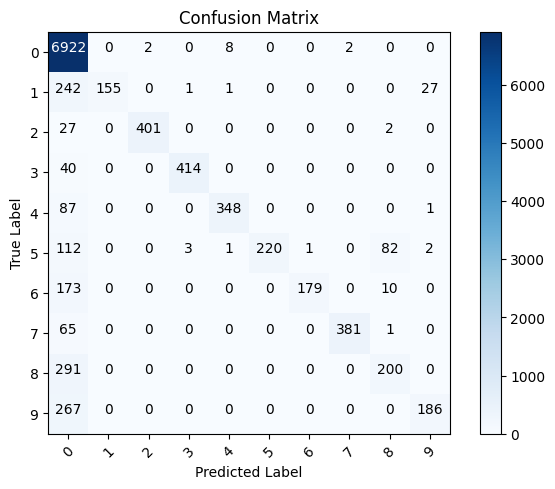

In [4]:
# Print evaluation metrics
print(f"% Extracted Grids  : {percent_extracted_grids}")
print(f"All Digits Accuracy: {all_digits_accuracy}")
print(f"Digits     Accuracy: {digits_accuracy}")

# Compute and print the confusion matrix
cm = confusion_matrix(digits_true, digits_pred)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
classes = range(10)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")